In [43]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

Edit Jupyter Notebook formatting:

Edit Pyplot formatting:

In [44]:
params = {'legend.fontsize': 15,
          'figure.figsize': (8, 6),
         'axes.labelsize': 15,
         'axes.titlesize':15,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)

# Fluid Flow Over a Wavy Bedform

The following is based on an example problem presented by Dr. David Furbish in his text *Fluid Physics in Geology* (Chapter ?? Problem ??). For a more detailed mathematical treatment, which was completed under the supervision of Dr. Furbish, see "Fluid Flow Over A Wavy Bedform.pdf" in the parent directory

## Introduction
Imagine a natural stream of flowing down a very gentle incline. The geometry of natural stream beds is often rough and complex and flow over such beds is hard to characterize due to its turbulence and 3-dimensional nature. We might try to understand the behavior of streamflow over rough bedforms by attempting to describe flow over a bedform of simpler geometry which might be described in a mathematically simple manner. For example, we could imagine flow over a wavy bedform and describe the wavy bedform with a sinusoidal function. A sinusoidal wave looks like this:

![Sinusoidal Function](wavybedform_images/bedform_diagram.png)

Imagine stream flow in a straight channel of uniform width where the positive x-axis points downstream and parallel to the stream bed (inclined coordinate system), the y-axis goes across the stream from one bank to the other, and the z-axis is normal to the stream bed with the positive direction upward. Because the stream is of uniform width we neglect flow near the banks, ignore flow in the y-direction, and approximate flow in the center of the channel. We can describe this two-dimensional flow using two of the Navier-Stokes equation and a simplified continuity equation,


	

$u \frac{\partial u}{ \partial x} + w \frac{\partial u}{\partial z} = -\frac{1}{\rho} \frac{\partial p}{\partial x} - g \frac{\partial z_0}{\partial x} + \frac{1}{\rho} \Big( \frac{\partial}{\partial x} \tau_{xx} + \frac{\partial}{\partial z}\tau_{zx}\Big)$

$u \frac{\partial w}{ \partial x} + w \frac{\partial w}{\partial z} = -\frac{1}{\rho} \frac{\partial p}{\partial z} - g \frac{\partial z_0}{\partial z} + \frac{1}{\rho} \Big( \frac{\partial}{\partial x} \tau_{xz} + \frac{\partial}{\partial z}\tau_{zz}\Big)$

$\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} = 0$

where $z_0$ is a vertical coordinate in the Earth's reference frame.

These equations are incredibly complicated and likely do not have analytical solutions. We can simplify them by taking many mathematical steps. We make two assumptions worth mentioning here. The first assumption is that the sinuisoidal waveform of the stream bed has an amplitude that is much smaller than the wavelength. The second is that we can describe stresses at the streambed as a function of streamwise velocity and a friction coefficient, $\Gamma$, which is common to the engineering literature and similar to a Darcy-Weisbach coefficient. We also go through the process of depth-averaging each term and linearizing our equations by following a method similar to Reynolds averaging, in which each variable is considered equal to a the sum of a reach-averaged value and perturbations around that reach-averaged value, where reach-averaged means averaged over a stream-wise distance. For example, streamwise velocity u can be rewritten u = U + u'. Our equations above eventually simplify to the following two equations 

$\frac{1}{U}\frac{\partial u\prime}{\partial x} + \frac{g}{U^2} \frac{\partial \zeta\prime}{\partial x} - \frac{\Gamma}{H^2} \zeta\prime + \frac{2 \Gamma}{H U} u\prime = - \frac{\Gamma}{H^2} \eta\prime $

$\frac{1}{U} \frac{\partial u\prime}{\partial x} + \frac{1}{H} \frac{\partial \zeta\prime}{\partial x} = \frac{1}{H} \frac{\partial \eta\prime}{\partial x}$.

After some effort, we are able to find analytical solutions for the height of the fluid surface, $\zeta$, and the depth-averaged fluid velocity, $u$, as functions of streamwise distance, x. These solutions that are based on the assumption that the streambed geometry can be described by the sinusoidal function 

$ \eta = E + \eta_0 cos(\frac{2 \pi}{\lambda} x) $

where $E$ is the average elevation of the bedform (we might set it to 0), $\eta_0$ is the amplitude of the streambed waveform, and $\lambda$ is the wavelength of the streambed waveform. The solutions for $\zeta$ and $u$ are also sinusoids. The solution for fluid surface height is 

$ \zeta = H + \zeta_0 cos(\frac{2 \pi}{\lambda} x + \phi_\zeta)$

where $H$ is the average depth of the fluid (for which we select a constant value), $\zeta_0$ is the amplitude of the fluid surface waveform, and $\phi_\zeta$ is the phase angle offsetting the waveform of the fluid surface from the waveform of the streambed waveform. The solution for the depth-averaged fluid velocity, which from here on we refer to as $u$, is

$ u = U + u_0 cos ( \frac{2 \pi}{\lambda} x + \phi_u)$

where $U$ is the average streamwise velocity of the fluid (for which we select a constant value), $u_0$ is the amplitude of the of the streamwise velocity waveform, and $\phi_u$ is the phase angle offsetting the waveform of the streamwise velocity from the waveform of the streambed waveform.

$u_0 = \frac{U}{H} \frac{\beta \omega}{\sqrt{9\alpha^2 + \omega^2(1 - \beta)^2}} \eta_0 $,

$\zeta_0 = \frac{\sqrt{9 \alpha^2 + \omega^2}}{\sqrt{9\alpha^2 + \omega^2(1 - \beta)^2}} \eta_0$,

$\phi_u = -\frac{\pi}{2} - 
    tan^{-1}\Big( \frac{\omega (1 - \beta)}{3 \alpha}\Big)$,
    
and

$\phi_\zeta = tan^{-1}\Big( \frac{\omega}{3 \alpha} \Big) - tan^{-1}\Big( \frac{\omega (1 - \beta)}{3 \alpha}\Big)$

where

$\alpha = \frac{\Gamma}{H}, \quad \beta = \frac{g H}{U^2}, \quad \text{and} \quad \omega = \frac{2 \pi}{\lambda}$.

We now see that we can plot $\eta$, $\zeta$, and $u$ by defining only the parameters $\Gamma, H, g, U, \lambda, \eta_0$ which represent, respectively, a friction coefficient, reach-averaged fluid depth, Earth's gravitational constant, reach-averaged streamwise velocity, the bedform wavelength, and the bedform wave amplitude.

Literature suggests that $\Gamma$ is generally on the order of 0.01 (Furbish, 1998). We might imagine that a reasonable natural stream might have an average fluid depth $H$ between 1 and 10 meters and an average streamwise velocity $U$ between 0.1 and 10 meters per second (although on the higher end of this scale). Streambed waveform wavelength might vary significantly and might experiment with values from 1 to 100. streambed waveform amplitudge should be significantly smaller than wavelength, and we might imagine a streambed to vary a couple centimeters (say, 0.05 meters) for the smaller wavelength and maybe larger for the larger wavelength (say, 0.5 meters), although this only seems likely if average water depth is very large (certainly larger than 5 meters or so). Regardless, we see that bedform amplitude only scales the ampltides of the water surface height and velocity waveforms proportionaly and so is not particularly interesting.

Let's set some parameters and get plotting!

In [50]:
gamma = 0.01
H = 1.0 # meters
g = 9.81 # meters per second
U = 1.0 # meters
lamb = 100 #meters, in place of lambda b/c lambda is a py keyword
eta0 = 0.05 #meters

We create a simple function that returns our streambed, fluid surface, and fluid velocity waveforms when provided the six parameters listed above and an x-domain over which to plot.

In [51]:
#Parameters: n0, lamb, U, g, H, gamm, x: bed waveform 
#    amplitude, bed waveform wavelength, average 
#    streamwise velocity, gravitational acceleration, 
#    average fluid depth, friction coefficient, 
#    x-domain
#returns: 3 waveforms in the following order: stream bed,
#    fluid surface height, depth-averaged streamwise
#    velocity.
def getPlots(n0, lamb, U, g, H, gamm, x):
    alpha = gamm/H
    beta = g*H/U**2
    omega = 2*np.pi/lamb
    u0 = (U/H)*n0*beta*omega/np.sqrt(9*alpha**2 + omega**2*(1-beta)**2)
    z0 = n0*(9*alpha**2 + omega**2)/np.sqrt(9*alpha**2 + omega**2*(1-beta)**2)
    phi_u = -np.pi/2 - np.arctan(omega*(1-beta)/(3*alpha))
    phi_z = np.arctan(omega/(3*alpha)) - np.arctan(omega*(1-beta)/(3*alpha))    
    n_ = n0*np.cos(omega*x)
    u_ = u0*np.cos(omega*x + phi_u)
    z_ = z0*np.cos(omega*x + phi_z)
    return(n_, z_, u_)

Lets plot using the parameters above. First we set up Pyplot so that we can plot all three waveforms neatly next to eachother.

In [52]:
#Set up our figure to contain 3 subplots
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,8))
# Remove horizontal space between axes of the 3 subplots
fig.subplots_adjust(hspace=.1)
#set our x-domain
x = np.linspace(0,lamb,1000)
#retrieve plots
bedform, surface, velocity = getPlots(eta0, lamb, U, g, H, gamma, x)

Plot all three waveforms (and make the plots pretty with too many lines of code):

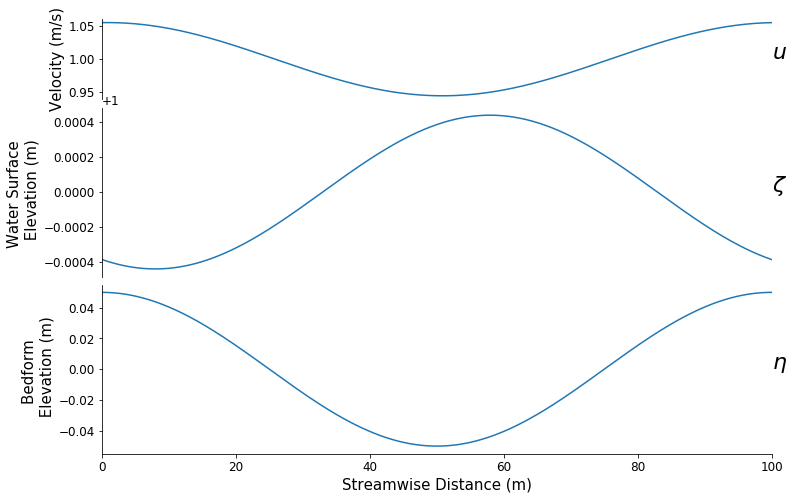

In [53]:
# Plot streambed waveform:
plt.subplot2grid((5,3), (3,0), colspan=3, rowspan=2)
# plot bedform
plt.plot(x, bedform, label='Stream Bed')
# make it pretty...
plt.xlim(0,lamb)
ax = plt.gca(); ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
plt.annotate('$\eta$', xy=(lamb,0), fontsize=22)
plt.xlabel('Streamwise Distance (m)')
plt.ylabel('Bedform \n Elevation (m)')

# Plot fluid velocity waveform:
plt.subplot2grid((5,3), (0,0), colspan=3, rowspan=1)
plt.plot(x, velocity + U)
plt.xlim(0,lamb)
ax = plt.gca(); ax.axes.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False); ax.spines['bottom'].set_visible(False)
plt.annotate('$u$', xy=(lamb,1.0), fontsize=22)
plt.ylabel('Velocity (m/s)')

# Plot fluid surface waveform:
plt.subplot2grid((5,3), (1,0), colspan=3, rowspan=2)
plt.plot(x, surface + H)
plt.xlim(0,lamb)
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
plt.annotate('$\zeta$', xy=(lamb,1.0), fontsize=22)
plt.ylabel('Water Surface \n Elevation (m)')
plt.show()

We embed the above code into a function that is written in the local plotWavyBedform.py file such that we can experiment with different parameters and we don't have to look at annoying Matplotlib code every time.

In [56]:
import sys
sys.path.append('library/')
from plotWavyBedform import plotWavyBedform

Now we can easily expore how the different parameters affect how the elevation of the water surface and the depth-averaged velocity respond to the geometry of the wavy bedform. First lets change our bedform wavelength. Previously we set the wavelength to a length of 100 meters. A rough streambed might have sinusoidal geometries that have much smaller wavelengths, such as 0.1 meters. Lets see what happens when we let bedform wavelength shrink. First we plot with a wavelength of 50 meters, which allows to see the effects of shrinking wavelength more clearly.

## Wavelength 50 meters

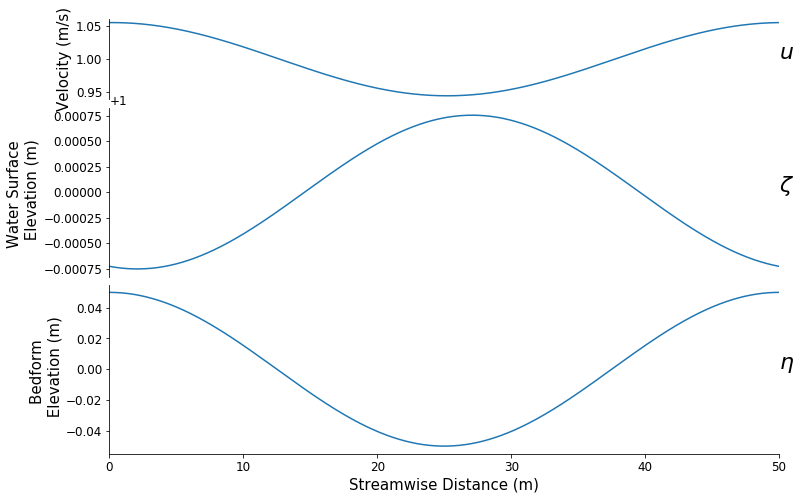

In [60]:
lamb = 50.0 
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

## Wavelength 1 meter

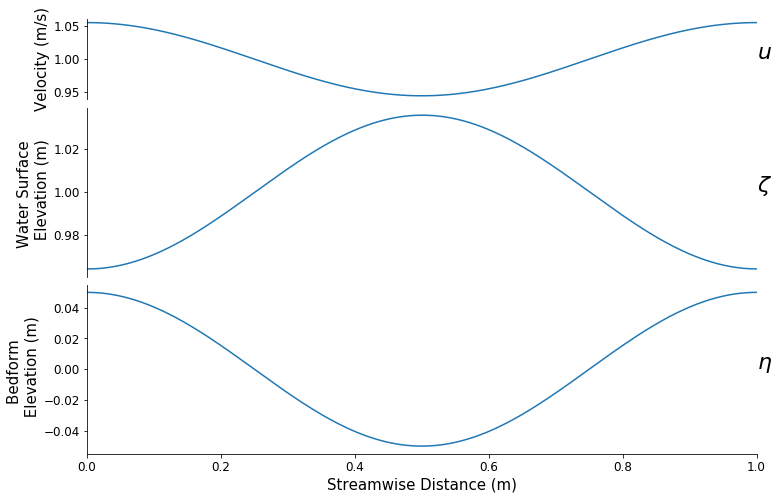

In [62]:
lamb = 1.0 #meters, in place of lambda b/c lambda is a py keyword
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

## Wavelength 0.1 meters

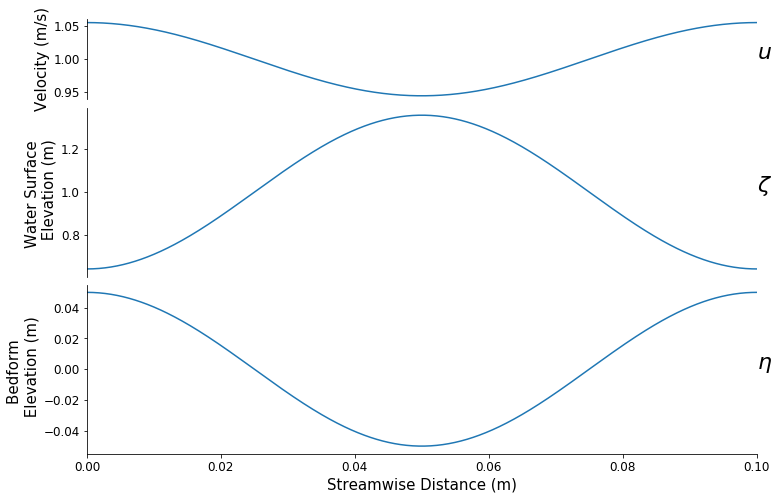

In [63]:
lamb = 0.1 #meters, in place of lambda b/c lambda is a py keyword
x = np.linspace(0,lamb,1000)
plotWavyBedform(eta0, lamb, U, g, H, gamma, x)

# References

Furbish, D.J. Fluid Physics in Geology: An Introduction to Fluid Motions on Earth's Surface and within Its Crust. Oxford University Press. 1996.

Furbish, D.J. Irregular bed forms in steep, rough channels. Water Resources Research, Vol. 34, No. 12, Pages 3635-3659, December 1998.